Installing Libraries

In [9]:
!pip install pandas
!pip install numpy matplotlib seaborn
!pip install scikit-learn
!pip install plotly
!pip install nbformat --upgrade

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

Load Dataset

In [2]:
# Load the dataset
file_path = "data.csv"
data = pd.read_csv(file_path)

# Display the first few rows
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Check Data Outliers, missing values, imbalance and normalization 

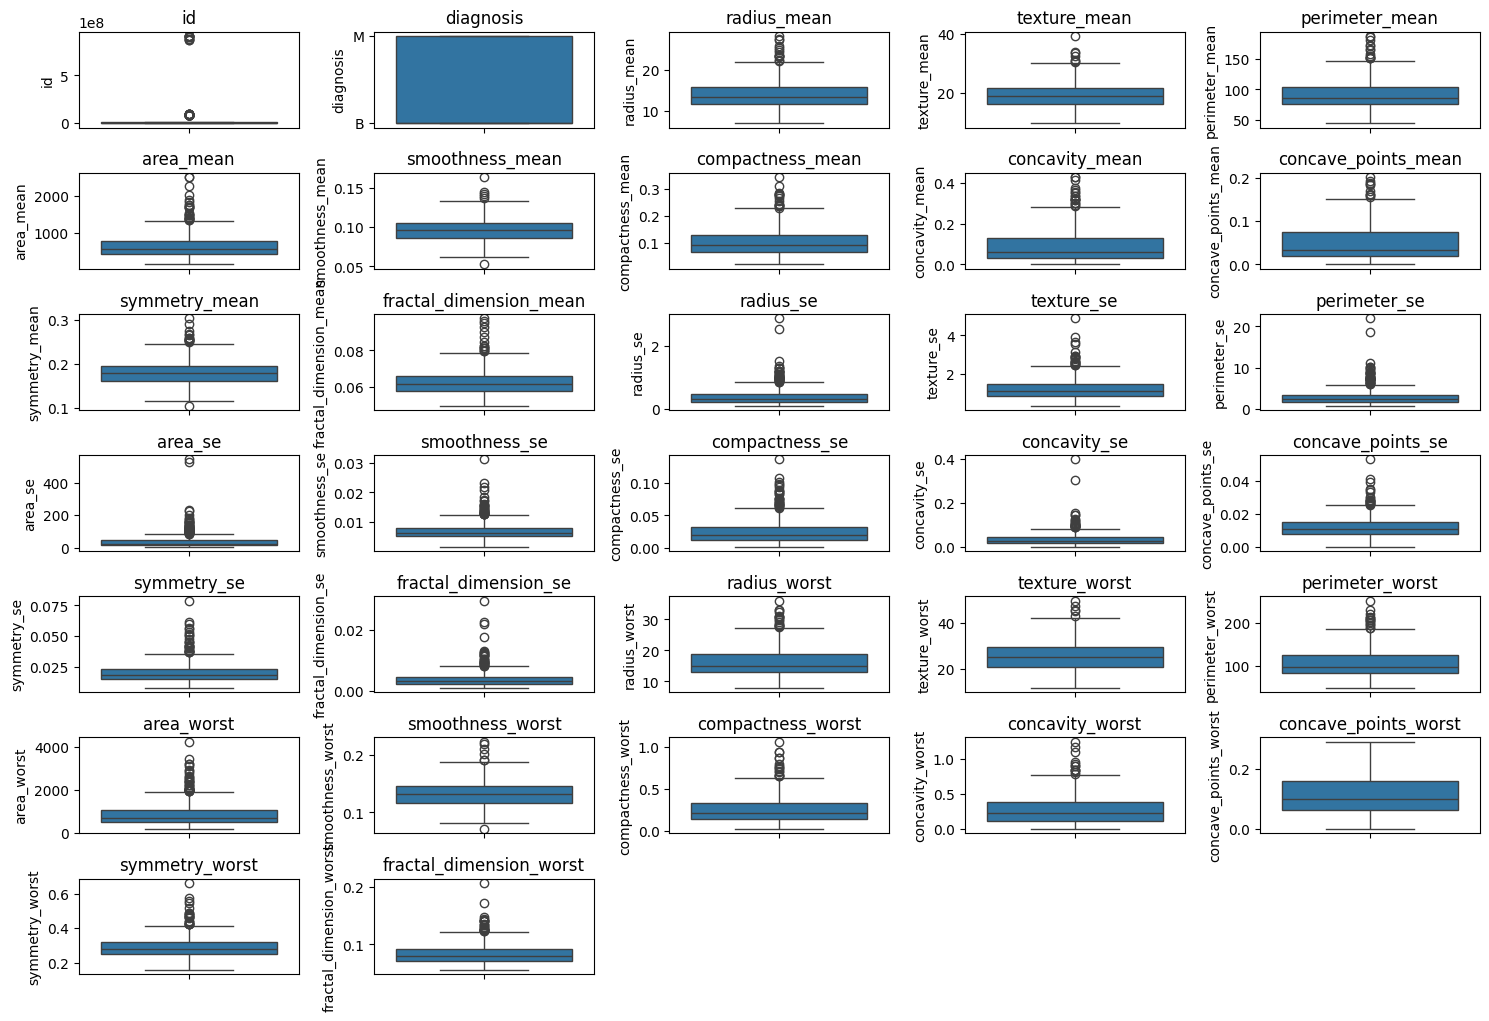


Missing Values in Each Column:
Series([], dtype: int64)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  t

In [3]:
# Veiwing current Data Outliers
plt.figure(figsize=(15, 10))
num_features = len(data.columns)
rows = (num_features // 5) + 1  # 5 columns per row
for i, col in enumerate(data.columns, 1):
    plt.subplot(rows, 5, i)
    sns.boxplot(data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values[missing_values > 0])

# Checking For Classes imbalance!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Check column Data types
print("\nDataset Information:")
data.info()


In [4]:
# Preprocessing: Remove any non-numeric columns (id, diagnosis)
if 'id' in data.columns:
    data = data.drop(columns=['id'])
if 'diagnosis' in data.columns:
    data = data.drop(columns=['diagnosis'])

# If there are missing values, fill missing values with the mean
data = data.fillna(data.mean())

#Handle Outliers, Remove them (based on a threshold, e.g., 1.5 times the interquartile range)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Standardize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Convert back to DataFrame for easier handling
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1.964461,0.377377,1.973596,2.108920,0.112751,0.650915,1.066356,1.488638,0.277054,-0.756789,...,2.413510,0.521788,2.468580,2.665355,0.767070,0.428375,1.121869,1.941020,0.625692,0.333092
1,0.134540,0.594978,0.225722,0.033027,2.126689,2.239566,0.677832,0.935739,2.210386,2.655183,...,0.610898,0.607065,0.541116,0.511879,1.815139,1.456575,0.369659,1.187592,0.931552,2.854076
2,1.065623,1.211941,0.968866,1.020884,-0.930314,-0.560180,-0.560181,-0.104415,-1.002217,-0.846630,...,1.270617,1.626840,1.138359,1.280326,-0.523241,-0.524523,-0.459405,0.068471,0.361226,0.400490
3,0.968887,-0.157666,1.022372,0.945414,0.317713,1.229127,0.797817,1.178389,0.507899,-0.077988,...,1.651581,0.454277,1.712978,1.732891,0.539659,3.248023,1.244971,1.696556,2.302172,2.027655
4,0.997102,1.393701,1.028317,0.953051,-0.768502,0.399021,0.794553,0.693088,0.531946,-1.563363,...,0.542758,0.521788,0.604460,0.449613,-0.770426,-0.177761,0.127537,0.311933,0.041568,-1.336598


Implementing PCA

In [17]:
def pca(data, n_components):
    # Step 1: Compute the covariance matrix
    cov_matrix = np.cov(data.T)
    
    # Step 2: Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    
    # Step 3: Sort eigenvectors by descending eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Step 4: Select the top n_components
    top_eigenvectors = eigenvectors[:, :n_components]
    
    # Step 5: Project the data
    reduced_data = np.dot(data, top_eigenvectors)
    return reduced_data, eigenvalues, eigenvectors

# Example: Reduce to 2 components
reduced_data, eigenvalues, eigenvectors = pca(data_scaled.values, n_components=2)
print(reduced_data[:5])


[[-5.92706678  3.50541662]
 [-5.15701236 -4.1752157 ]
 [-1.17301257  3.40849842]
 [-6.36932678 -0.73928499]
 [-2.78679715  0.66664918]]


Mohamed's previous pca

In [16]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Fit PCA (assuming PCA is already fitted with n_components=2 or n_components=3)
pca_sci = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled.values)

# Display the components and their loadings
component_df = pd.DataFrame(pca.components_, index=[f'PC{i+1}' for i in range(pca.n_components_)])
print("PCA Components (Loadings):")
print(component_df)

# To show the absolute contributions of features for each component
feature_contributions = component_df.abs()

# Show the features that contribute most to each principal component
for i in range(pca.n_components_):
    print(f"Top contributing features for PC{i+1}:")
    top_contributors = feature_contributions.iloc[i].sort_values(ascending=False).head(3)  # top 3 features
    print(top_contributors)
    print()


PCA Components (Loadings):
           0         1         2         3         4         5         6   \
PC1  0.223792  0.102501  0.232150  0.224648  0.120139  0.229641  0.260066   
PC2 -0.233852 -0.033370 -0.214797 -0.231782  0.234918  0.185151  0.064162   

           7         8         9   ...        20        21        22  \
PC1  0.263049  0.102445  0.012468  ...  0.238475  0.110057  0.247101   
PC2  0.004633  0.163789  0.369300  ... -0.210907 -0.024140 -0.187405   

           23        24        25        26        27        28        29  
PC1  0.237715  0.131043  0.217699  0.240595  0.253922  0.109488  0.121432  
PC2 -0.207828  0.209792  0.154270  0.079832  0.027479  0.123822  0.279287  

[2 rows x 30 columns]
Top contributing features for PC1:
7     0.263049
6     0.260066
27    0.253922
Name: PC1, dtype: float64

Top contributing features for PC2:
9     0.369300
19    0.292723
29    0.279287
Name: PC2, dtype: float64



Implementing K-means

In [14]:
def kmeans(data, k, max_iter=100):
    # Step 1: Randomly initialize centroids
    np.random.seed(42)
    random_indices = np.random.choice(data.shape[0], k, replace=False)
    centroids = data[random_indices]
    
    for i in range(max_iter):
        # Step 2: Assign points to nearest centroid
        distances = np.linalg.norm(data[:, None] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        # Step 3: Recalculate centroids
        new_centroids = np.array([data[labels == j].mean(axis=0) for j in range(k)])
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    # Compute SSE
    sse = np.sum((data - centroids[labels]) ** 2)
    return labels, centroids, sse

# Example: Cluster into 3 clusters
labels, centroids, sse = kmeans(data_scaled.values, k=3)
print(f"SSE: {sse}")

SSE: 7268.018136439987


Implementing Elbow Method

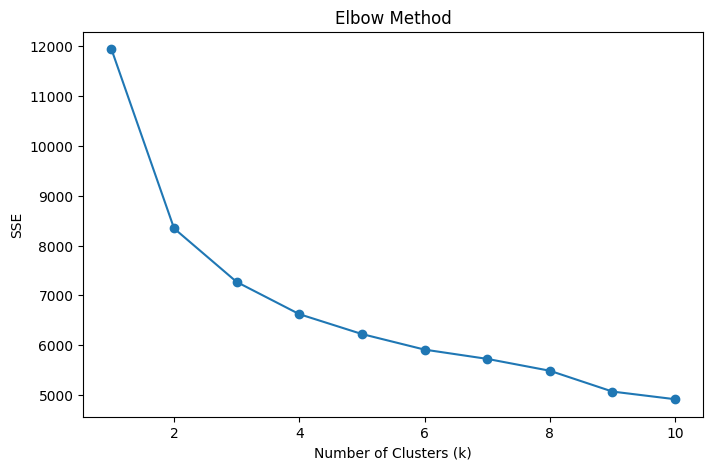

In [18]:
def elbow_method(data, max_k):
    sse_list = []
    for k in range(1, max_k + 1):
        _, _, sse = kmeans(data, k)
        sse_list.append(sse)
    
    # Plot the elbow curve
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k + 1), sse_list, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('SSE')
    plt.title('Elbow Method')
    plt.show()

# Example: Apply elbow method
elbow_method(data_scaled.values, max_k=10)

First Experiment: K-Means on Original Data

In [19]:
labels, centroids, sse = kmeans(data_scaled.values, k=3)
print(f"SSE for original data: {sse}")

SSE for original data: 7268.018136439987


Second Experiment: PCA + K-Means

In [20]:
reduced_data, _, _ = pca(data_scaled.values, n_components=2)
labels, centroids, sse = kmeans(reduced_data, k=3)
print(f"SSE after PCA: {sse}")

SSE after PCA: 2688.9513662313548


Visualizing clusters for PCA-reduced data

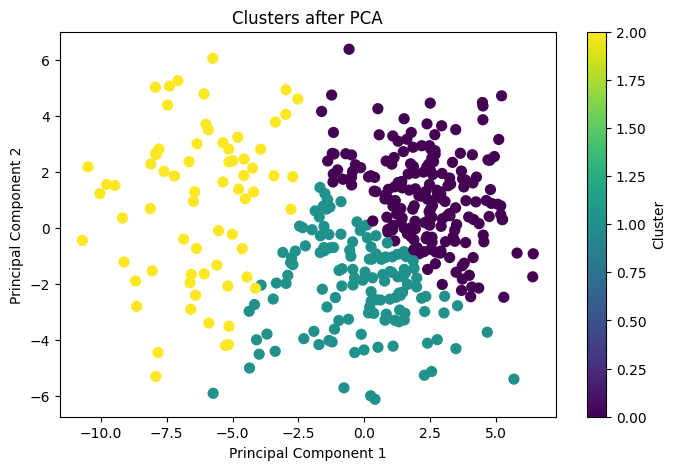

In [24]:
def visualize_clusters(data, labels, title):
    plt.figure(figsize=(8, 5))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

visualize_clusters(reduced_data, labels, "Clusters after PCA")

Validating with scikit-learn

a:\pycharm\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "a:\pycharm\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "a:\pycharm\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "a:\pycharm\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "a:\pycharm\lib\subprocess.py", line 1440, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


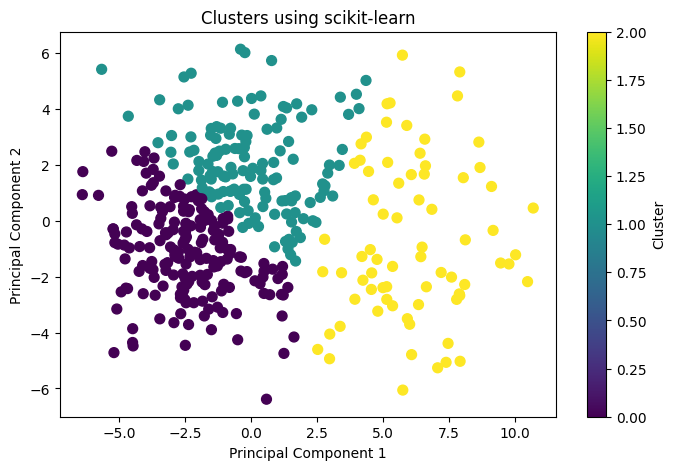

In [22]:
# PCA using scikit-learn
pca_model = PCA(n_components=2)
data_reduced = pca_model.fit_transform(data_scaled)

# K-Means using scikit-learn
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(data_reduced)
sklearn_labels = kmeans_model.labels_

# Visualize results
visualize_clusters(data_reduced, sklearn_labels, "Clusters using scikit-learn")
